## Machine learning - supervised learning - Linear Models

In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

w[0]: 0.393906  b: -0.031804


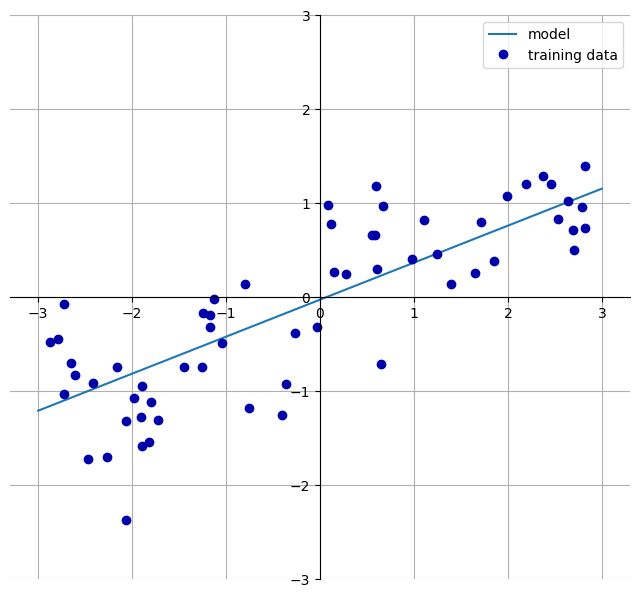

In [1]:
import mglearn 
mglearn.plots.plot_linear_regression_wave()

### 1.0 Linear regression (aka Ordinary Least Square )

In [3]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test , y_train, y_test = train_test_split(X,y,random_state = 42)
lr = LinearRegression().fit(X_train, y_train)

In [5]:
print("lr.coef_ : {}".format(lr.coef_))
print("lr.intercept_ : {}".format(lr.intercept_))

lr.coef_ : [0.39390555]
lr.intercept_ : -0.031804343026759746


In [9]:
print("Training score : {:.2f}".format(lr.score(X_train, y_train)))
print("Test Score : {:.2f}".format(lr.score(X_test, y_test)))

Training score : 0.67
Test Score : 0.66


In [10]:
# Another example for test the score of the trainning and test 
X, y = mglearn.datasets.load_extended_boston()
X_train ,X_test, y_train, y_test = train_test_split(X,y , random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print("Training Score is  : {:.2f}".format(lr.score(X_train, y_train)))
print("Test Score : {:.2f}".format(lr.score(X_test, y_test)))

Training Score is  : 0.95
Test Score : 0.61


### 2.0 Ridge Regression

In [12]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)

print("Training Score is  : {:.2f}".format(ridge.score(X_train, y_train)))
print("Test Score : {:.2f}".format(ridge.score(X_test, y_test)))

Training Score is  : 0.89
Test Score : 0.75


##### Use alpha in Ridge(alpha = 1) # here alpha value is variable
##### The value is nearest to zeor will give the accurate and presize value of score of both train and test

In [14]:
ridge10 =  Ridge(alpha = 10).fit(X_train, y_train)
print("Training Score is  : {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test Score : {:.2f}".format(ridge10.score(X_test, y_test)))

Training Score is  : 0.79
Test Score : 0.64


In [16]:
ridge01 =  Ridge(alpha = .1).fit(X_train, y_train)
print("Training Score is  : {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test Score : {:.2f}".format(ridge01.score(X_test, y_test)))

Training Score is  : 0.93
Test Score : 0.77


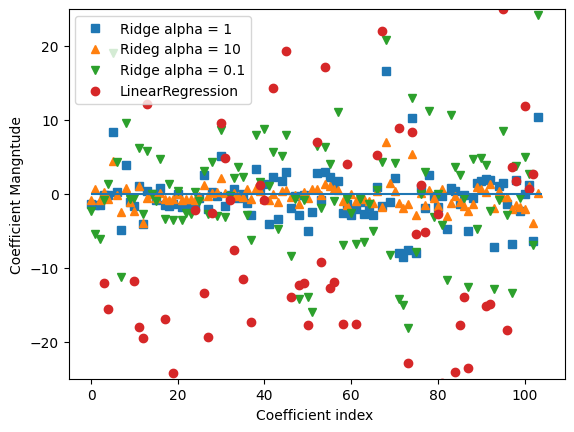

In [18]:
plt.plot(ridge.coef_, 's', label="Ridge alpha = 1")
plt.plot(ridge10.coef_, "^", label = "Rideg alpha = 10")
plt.plot(ridge01.coef_, "v", label = "Ridge alpha = 0.1")

plt.plot(lr.coef_,"o", label= "LinearRegression")

plt.xlabel("Coefficient index ")
plt.ylabel("Coefficient Mangntude")
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)
plt.legend()

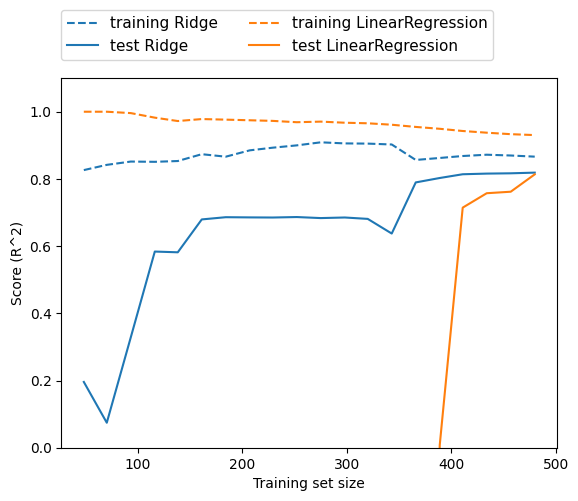

In [19]:
mglearn.plots.plot_ridge_n_samples()

### 3.0 Lasso

##### An alternative to Ridge for regularizing linear regression is Lasso. As with ridge regression, using the lasso also restricts coefficients to be close to zero, but in a slightly different way, called L1 regularization.8 The consequence of L1 regularization is that when using the lasso, some coefficients are exactly zero. This means some features are entirely ignored by the model

In [21]:
from sklearn.linear_model import Lasso
import numpy as np

lasso = Lasso().fit(X_train, y_train)

print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [22]:
# we can increase the default setting of "max_iter"
# otherwise the model warn us that we should increase max_iter.

lasso001 = Lasso(alpha=0.01, max_iter= 100000).fit(X_train, y_train)

print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [23]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


Text(0, 0.5, 'Coefficient magnitude')

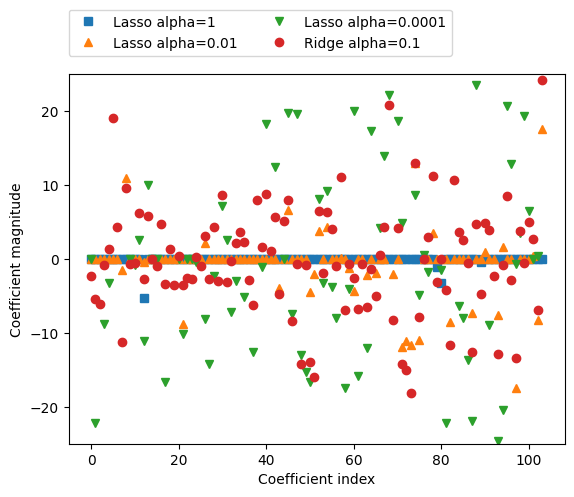

In [24]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

### 4.0 Linear Model for classification

##### The two most common linear classification algorithms are logistic regression, implemented in linear_model.LogisticRegression, and linear support vector machines (linear SVMs), implemented in svm.LinearSVC (SVC stands for support vector classifier). Despite its name, LogisticRegression is a classification algorithm and not aregression algorithm, and it should not be confused with LinearRegression.We can apply the LogisticRegression and LinearSVC models to the forge dataset, and visualize the decision boundary as found by the linear models 

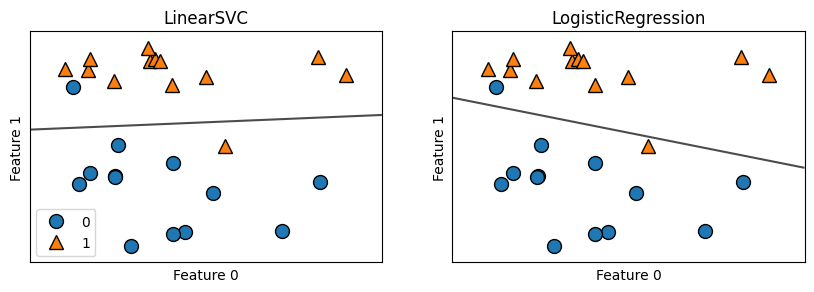

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X,y = mglearn.datasets.make_forge()

fig , axes = plt.subplots(1,2, figsize = (10, 3))

for model , ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax = ax, alpha=0.7)
    mglearn.discrete_scatter(X[:, 0 ],X[:,1],y, ax = ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")

axes[0].legend()

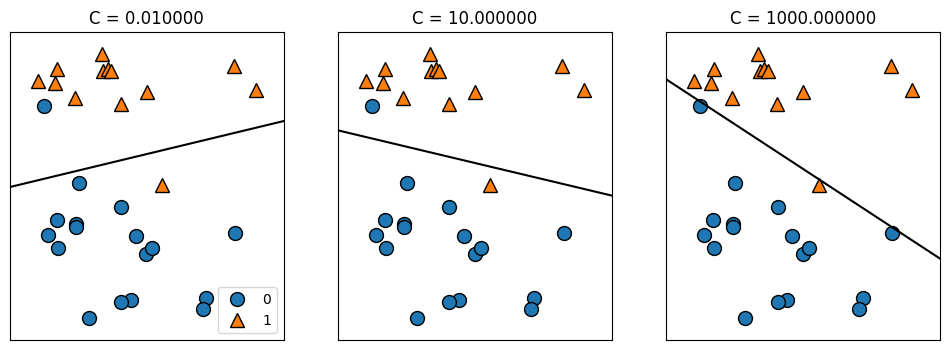

In [27]:
mglearn.plots.plot_linear_svc_regularization()